In [1]:
from mma import approx, splx2bf
from random import choice
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from pandas import read_csv
from gudhi.point_cloud.timedelay import TimeDelayEmbedding

## Retrieves the datasets from UCR

You have to download the UCR time series dataset first !
Available here : https://www.cs.ucr.edu/~eamonn/time_series_data/

In [2]:
dataset = "Coffee"

In [3]:
def get_dataset(dataset = "Coffee"):
    dataset_path = "./UCR/" + dataset + "/" + dataset + "_TRAIN.tsv"
    data = np.array(read_csv(dataset_path, delimiter='\t', header=None, index_col=0))
    return data
data = get_dataset(dataset)

Turns the time series into point clouds

In [4]:
tde = TimeDelayEmbedding(dim=3).transform(data)

Computes the 2-parameter filtration with alpha complex and kernel density estimation.

In [5]:
# points = choice(tde) # gets a random series
points = tde[0]
st= gd.AlphaComplex(points=points).create_simplex_tree(max_alpha_square=10)
boundary, F1 = splx2bf(st)
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(points)
F2 = -np.array(kde.score_samples(points))
filters = [F1,F2]
box=[[0,3],[6,5]] # best box depends on the dataset

Computes the bimodule approximation

In [6]:
mod = approx(boundary,filters, 0.01,box=box)

And plots the approximation

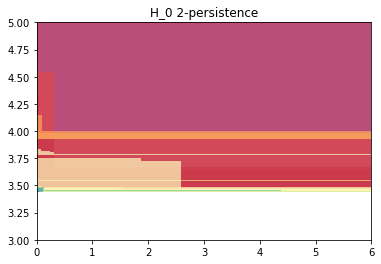

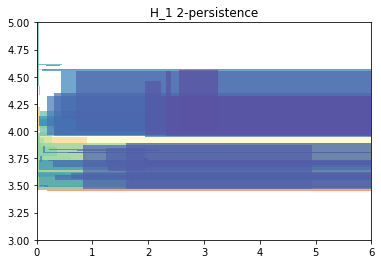

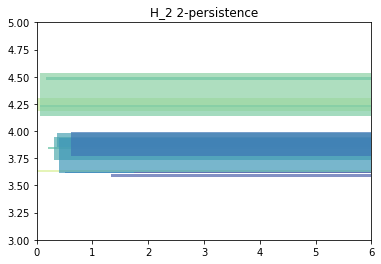

In [7]:
mod.plot(alpha = 0.7)

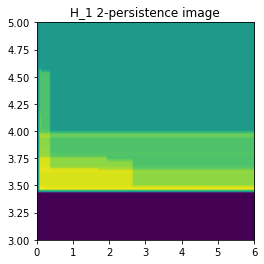

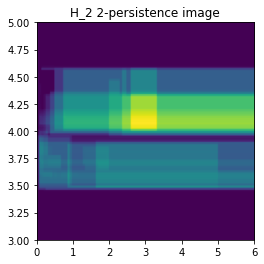

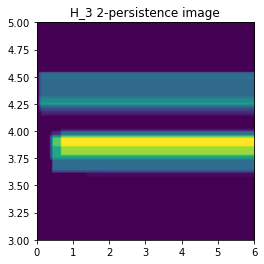

In [8]:
mod.image(bandwidth=0.01);